In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from wordcloud import WordCloud
import operator
import itertools
import re

In [14]:
file = Path('pg2265.txt').read_text(encoding="utf-8")
words = re.split(r"[\b\W\b]+", file)
frequentlyWords = []
frequencies = {}

for i in words:               
    if i not in frequentlyWords:
        frequentlyWords.append(i) 
for i in range(0, len(frequentlyWords)):
        frequencies[frequentlyWords[i]] = str.count(frequentlyWords[i])
          
sortedDictionary = dict(sorted(frequencies.items(),key=operator.itemgetter(1),reverse=True))
frequencies = dict(itertools.islice(sortedDictionary.items(), 20))

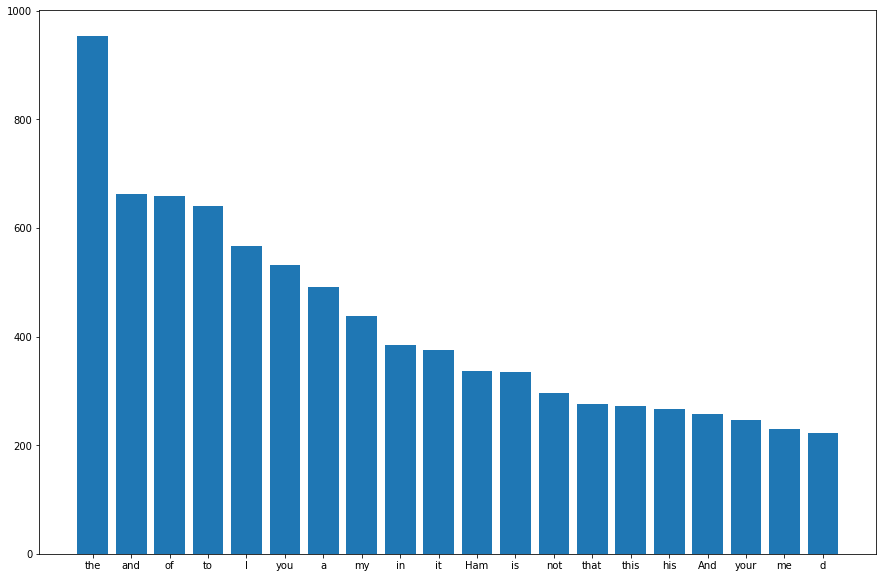

In [18]:
#bar chart
plt.figure(figsize=(15,10))
plt.bar(range(len(frequencies)), list(frequencies.values()), align='center')
plt.xticks(range(len(frequencies)), list(frequencies.keys()))
plt.show()

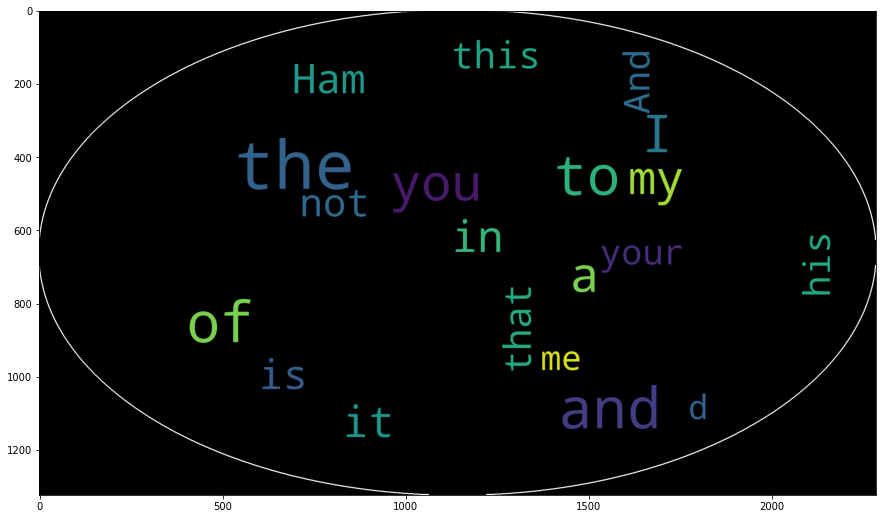

In [21]:
#word cloud
goethe_mask = np.array(Image.open("mask_oval.png"))
wordcloud = WordCloud(background_color='black',contour_width=3, contour_color='white',mask = goethe_mask).generate_from_frequencies(frequencies)

plt.figure(figsize = [15,10])
plt.imshow(wordcloud)
plt.show()